<a href="https://colab.research.google.com/github/TAN-07/Data-Warehousing-Mining/blob/main/DecisionTreeTitanicSurvival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question No. 2)

Build decision tree model to predict survival based on certain parameters
CSV file is available to download at  https://www.kaggle.com/c/titanic/data
In this file using following columns build a model to predict if person would
survive or not,
1. Pclass
2. Sex
3. Age
4. Fare

Calculate score of your model.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('titanic/train.csv')


In [ ]:
df = df[['Pclass','Sex','Age','Fare','Survived']] #using only columns specified in question
df.describe()

,Pclass,Age,Fare,Survived
count,891.000000,714.000000,891.000000,891.000000
mean,2.308642,29.699118,32.204208,0.383838
std,0.836071,14.526497,49.693429,0.486592
min,1.000000,0.420000,0.000000,0.000000
25%,2.000000,20.125000,7.910400,0.000000
50%,3.000000,28.000000,14.454200,0.000000
75%,3.000000,38.000000,31.000000,1.000000
max,3.000000,80.000000,512.329200,1.000000


In [ ]:
df = df.dropna() #removing rows with missing values
df.describe()

,Pclass,Age,Fare,Survived
count,714.000000,714.000000,714.000000,714.000000
mean,2.236695,29.699118,34.694514,0.406162
std,0.838250,14.526497,52.918930,0.491460
min,1.000000,0.420000,0.000000,0.000000
25%,1.000000,20.125000,8.050000,0.000000
50%,2.000000,28.000000,15.741700,0.000000
75%,3.000000,38.000000,33.375000,1.000000
max,3.000000,80.000000,512.329200,1.000000


In [ ]:
df['Sex'] = df['Sex'].apply(lambda x: x=='male')

df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,True,22.0,7.2500,0
1,1,False,38.0,71.2833,1
2,3,False,26.0,7.9250,1
3,1,False,35.0,53.1000,1
4,3,True,35.0,8.0500,0


In [ ]:
#we use 85% of data for training
n_train = 606 # n_train = 0.85 * 714 = 606
n_test = 108 # n_test = 108

X = df[['Pclass','Sex','Age','Fare']]
y = df[['Survived']]

X_train = X[:n_train]
y_train = y[:n_train]
X_test = X[n_train:]
y_test = y[n_train:]

print('X_train',X_train.shape)
print('y_train',y_train.shape)
print('X_test',X_test.shape)
print('y_test',y_test.shape)

X_train (606, 4)
y_train (606, 1)
X_test (108, 4)
y_test (108, 1)


In [ ]:
from sklearn import tree

classifier = tree.DecisionTreeClassifier(random_state=42)
classifier = classifier.fit(X_train,y_train)



In [ ]:
#plotting tree

import graphviz
dot_data = tree.export_graphviz(classifier, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render()


'Source.gv.pdf'

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = classifier.predict(X_test)

print('accuracy score:',accuracy_score(y_pred,y_test))

accuracy score: 0.8425925925925926


## Confusion Matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


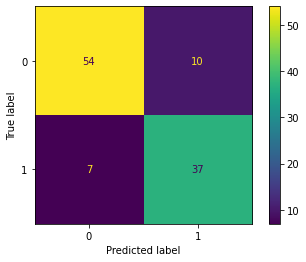

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(classifier,X_test,y_test)

## Classification Report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86        64
           1       0.79      0.84      0.81        44

    accuracy                           0.84       108
   macro avg       0.84      0.84      0.84       108
weighted avg       0.85      0.84      0.84       108

